In [3]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [4]:
old_data_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/KPMG_CLEANED_Old_Customers_Data.xlsx"

# old customers data: odf: 
odf = pd.read_excel(old_data_path)

In [5]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19408 entries, 0 to 19407
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           19408 non-null  int64         
 1   transaction_id                       19408 non-null  int64         
 2   product_id                           19408 non-null  int64         
 3   customer_id                          19408 non-null  int64         
 4   transaction_date                     19408 non-null  datetime64[ns]
 5   online_order                         19408 non-null  int64         
 6   order_status                         19408 non-null  object        
 7   brand                                19408 non-null  object        
 8   product_line                         19408 non-null  object        
 9   product_class                        19408 non-null  object        
 10  product_si

In [6]:
odf.drop('Unnamed: 0', axis=1, inplace= True)

In [7]:
odf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,full_name,age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,0,1,10.0,Kristos Anthony,69,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,...,0,1,10.0,Kristos Anthony,69,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,...,0,1,10.0,Kristos Anthony,69,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,0,1,10.0,Lauree O'Donnell,45,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,...,0,1,10.0,Lauree O'Donnell,45,4 Shopko Circle,2196,NSW,Australia,5


## Customer related visualizations:

In [8]:
# for visualizing customer data:
temp_view = odf.drop_duplicates(subset=['customer_id'])


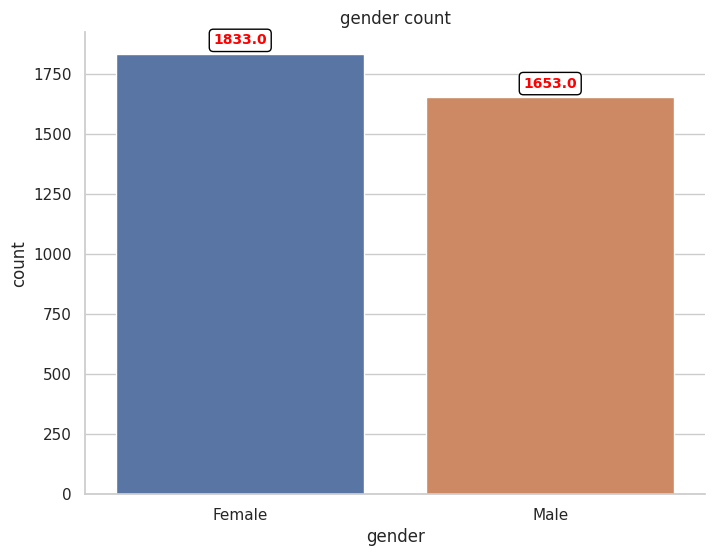

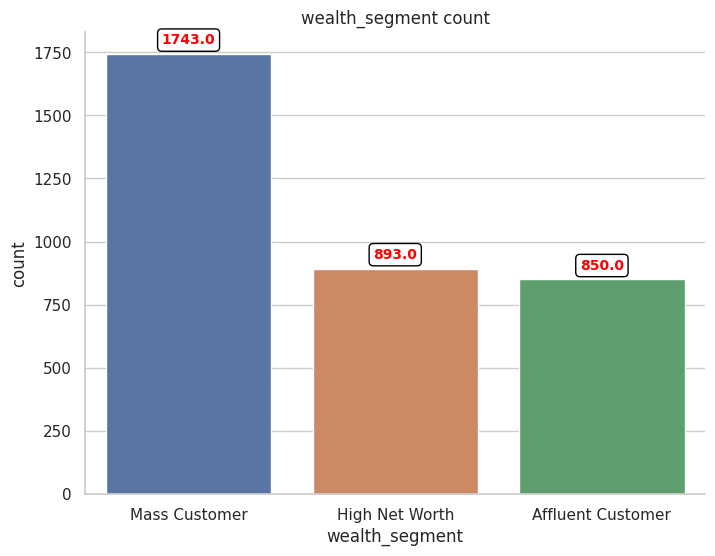

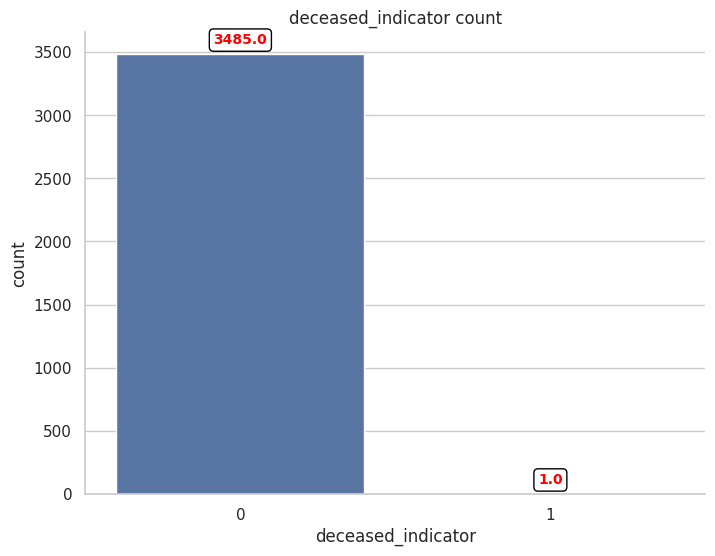

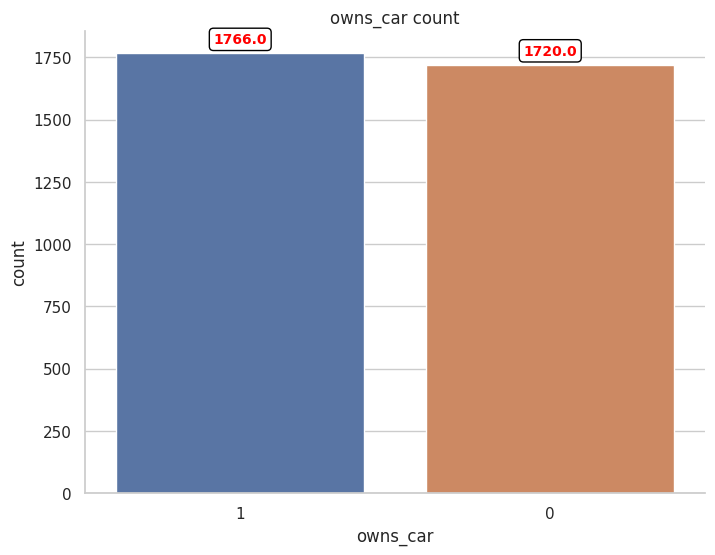

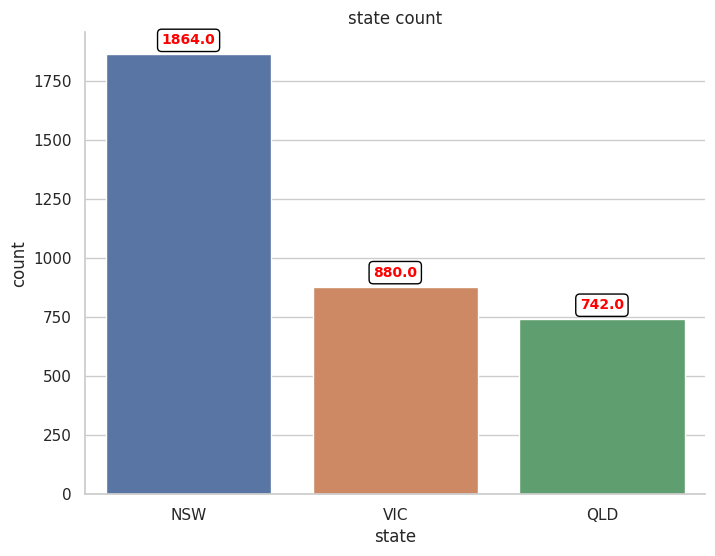

In [9]:
# List of categorical features
list_of_cat_features = ['gender', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state']

# Function to create countplot for a categorical feature
def count_plot(cat_feature, data):
    plt.figure(figsize=(8, 6))
    sns.set_palette("pastel")  # Change the color palette
    sns.set(style="whitegrid")  # Add grid lines

    ax = sns.countplot(x=cat_feature, data=data, order=data[cat_feature].value_counts().index)

    # Add count numbers on top of each bar
    for p in ax.patches:  
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    fontsize=10, color='red', weight='bold',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Remove the spines (borders) for a cleaner look
    sns.despine()
    plt.title(f'{cat_feature} count')
    plt.show()

#-------------------------------------------------------

for cat_feature in list_of_cat_features:
    count_plot(cat_feature=cat_feature, data=temp_view)


- slightly more females are buying bicycles than male customers. 

- Mass customers are significantly more that affluent customers and hight net worth customers. 

- the difference between people with car or without car is negligible.

- NSW is the state from where the most of the bicycles are being bought.

--------

### job and industry 

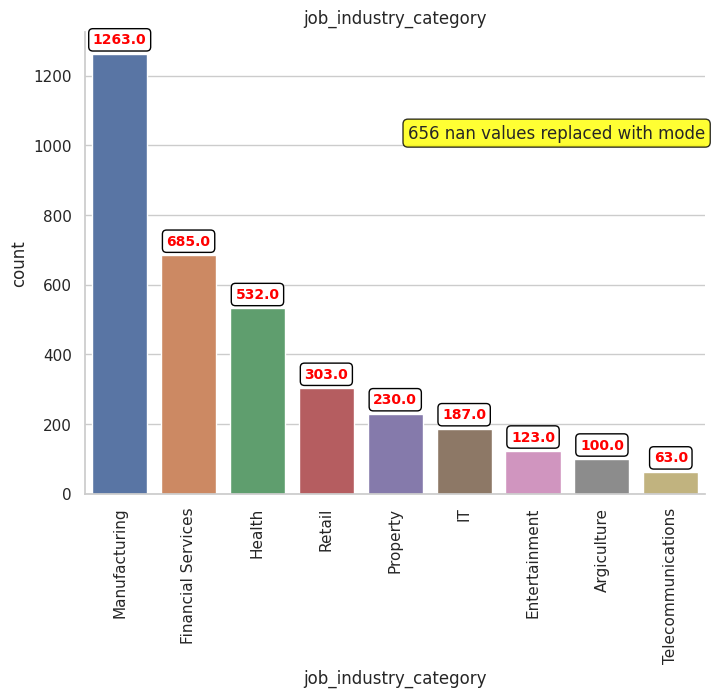

In [10]:
plt.figure(figsize=(8, 6))
sns.set_palette("pastel") 
sns.set(style="whitegrid")  

# Creating a countplot using Seaborn
ax = sns.countplot(x='job_industry_category', data=temp_view, order=temp_view['job_industry_category'].value_counts().index)

for p in ax.patches: 
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


plt.xticks(rotation= 90)
sns.despine()

plt.text(1, 0.8, f'656 nan values replaced with mode', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.title('job_industry_category')
plt.show()

- customers from `Manufacturing` bought the most bicycles. 

### age 

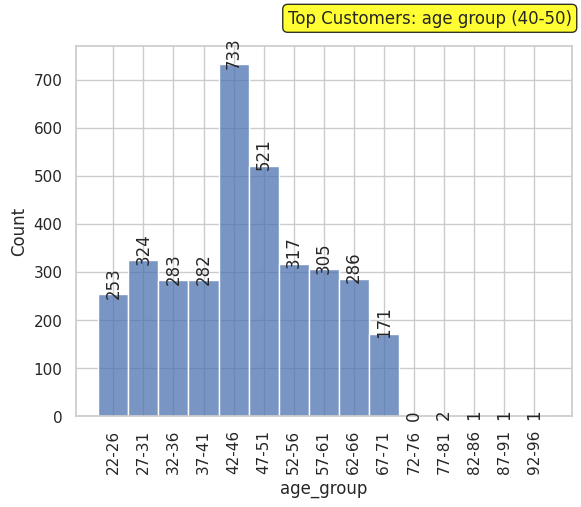

In [17]:
# Assuming 'temp_view' is your DataFrame
min_age = temp_view['age'].min()
max_age = temp_view['age'].max()

# Calculate dynamic age bins
age_interval = 5
age_bins = range(min_age, max_age + age_interval + 1, age_interval)

# Create age ranges
temp_view['age_group'] = pd.cut(temp_view['age'], 
                                bins=age_bins, 
                                labels=[f'{start}-{end - 1}' for start, end in zip(age_bins[:-1], age_bins[1:])])

ax = sns.histplot(x='age_group', data=temp_view, bins=len(age_bins) - 1)

# Annotate each bar with its count, rotating the numbers vertically
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation='vertical')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)
# Add a text box at the top-right corner
plt.text(1, 1.1, f'Top Customers: age group (40-50)', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.show()

We can clearly say that our customers are from range of 20 to 70 with very few exceptions. 

----

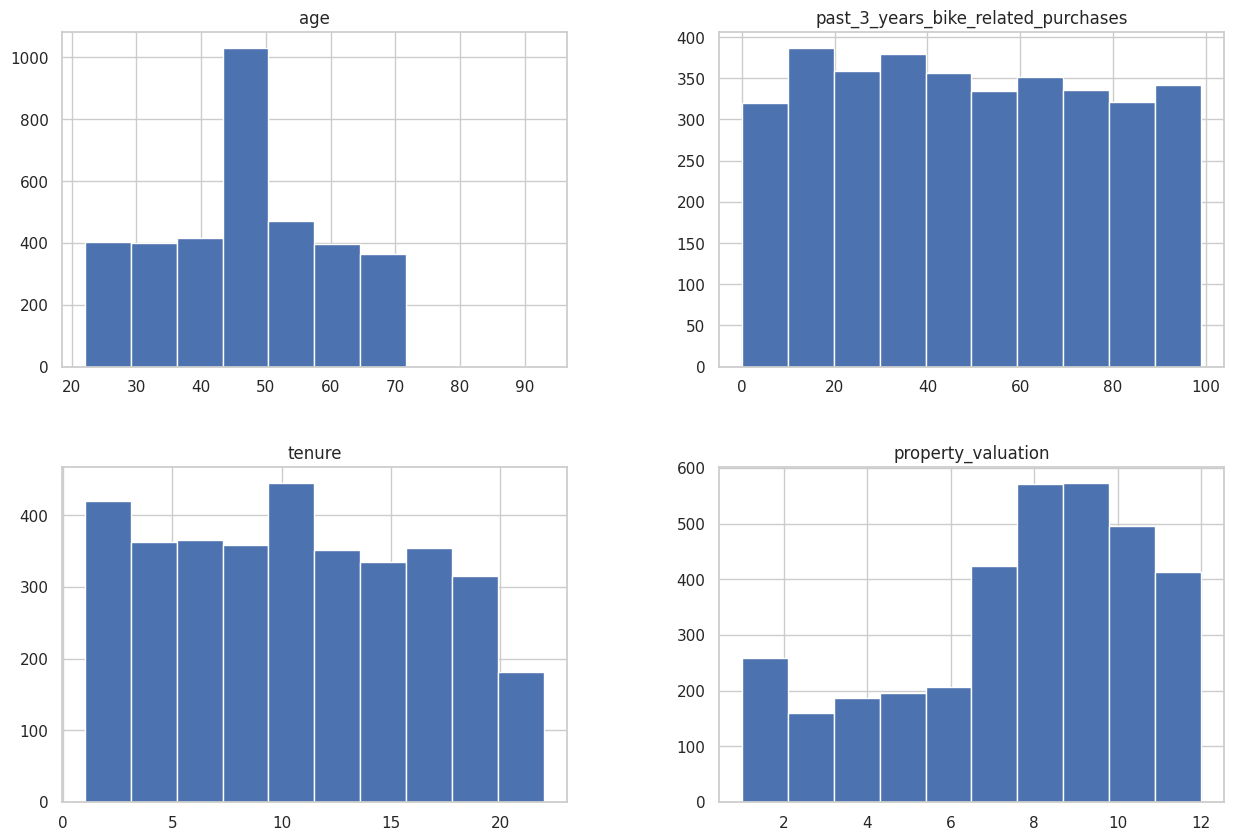

In [12]:
# plot numerical features data distribution:
import matplotlib.pyplot as plt
features_to_plot = ['age', 'past_3_years_bike_related_purchases', 'tenure', 'property_valuation']
temp_view[features_to_plot].hist(bins=10, figsize=(15,10))
plt.show()

-------

## Purchase related visualization:

### Transactions over time

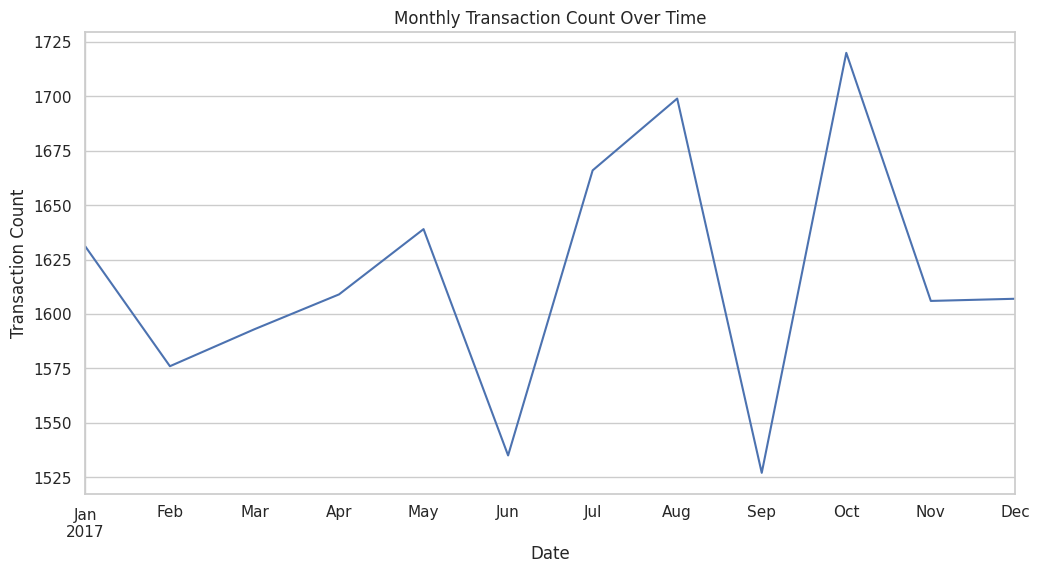

In [13]:
# Converting transaction_date to datetime
odf['transaction_date'] = pd.to_datetime(odf['transaction_date'])

# Plotting transactions over time
plt.figure(figsize=(12, 6))
odf.set_index('transaction_date')['transaction_id'].resample('M').count().plot()
plt.title('Monthly Transaction Count Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()


-----

In [14]:
numerical_features = odf.columns[odf.dtypes != 'object']
categorical_features = odf.columns[odf.dtypes == 'object']

print(f"Numerical columns: {numerical_features} \n-----------\ncategorical columns: {categorical_features}")

Numerical columns: Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'list_price', 'standard_cost',
       'product_first_sold_date', 'past_3_years_bike_related_purchases',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'postcode',
       'property_valuation'],
      dtype='object') 
-----------
categorical columns: Index(['order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'gender', 'job_title', 'job_industry_category',
       'wealth_segment', 'full_name', 'address', 'state', 'country'],
      dtype='object')


### Correlation between features

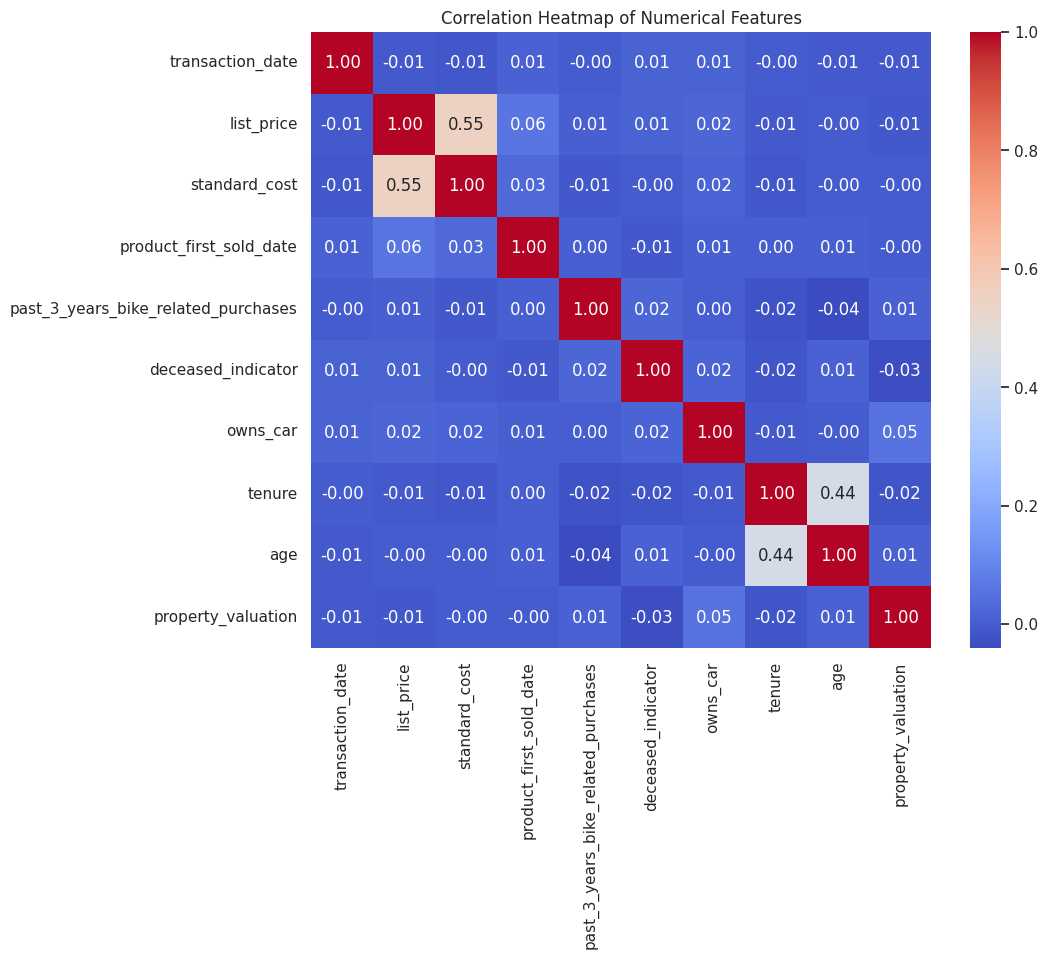

In [15]:
# Calculate correlation matrix
correlation_matrix = odf[numerical_features.drop(labels=['transaction_id', 'product_id', 'customer_id', 'postcode', 'online_order'])].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- There is some positive correlation between `age` and `tenure`.

- There is positive correlation between `list_price` and `standard_cost` for our analysis we can chose to consider `list_price` feature as deciding factor for valuable customers.

-------

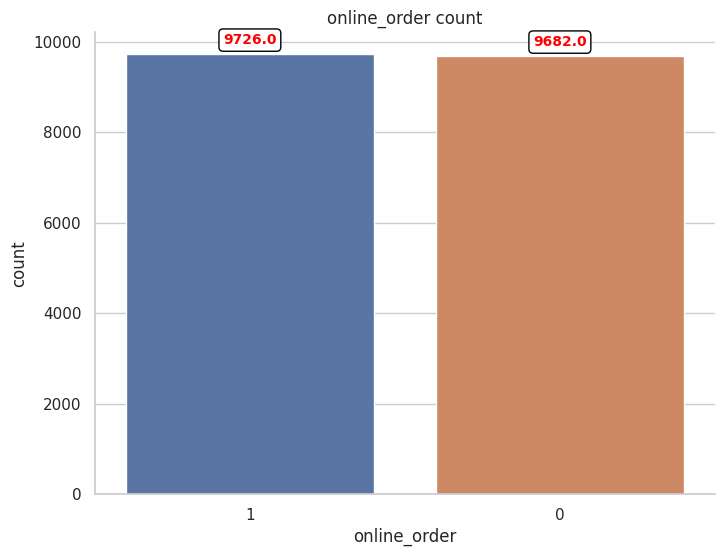

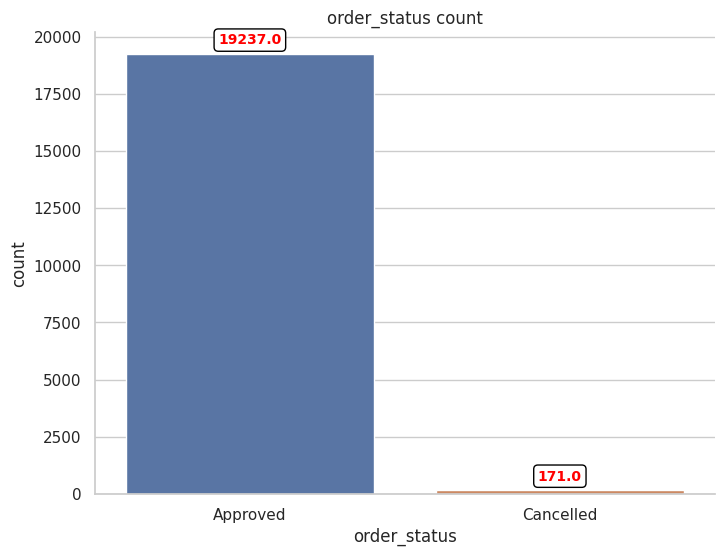

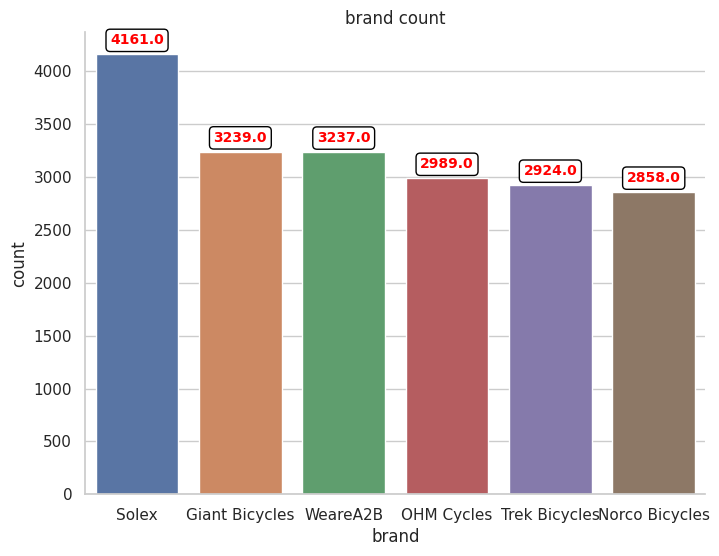

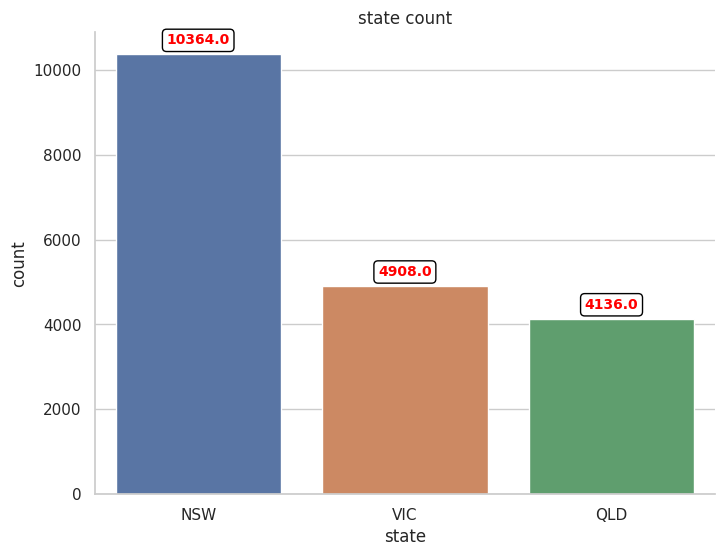

In [16]:
# List of categorical features
list_of_cat_features = ['online_order', 'order_status', 'brand', 'state']

def count_plot(cat_feature, data):

    plt.figure(figsize=(8, 6))
    sns.set_palette("pastel")
    sns.set(style="whitegrid")  

    ax = sns.countplot(x=cat_feature, data=data, order=data[cat_feature].value_counts().index)

    for p in ax.patches:  
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    fontsize=10, color='red', weight='bold',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    sns.despine()
    plt.title(f'{cat_feature} count')
    plt.show()

#------------------------------------------------   
for cat_feature in list_of_cat_features:
    count_plot(cat_feature=cat_feature, data=odf)


- online and offline market is almost same.

- negligible amount of orders were cancelled. 

- All the brands have almost same sells. Solex is the most sold brand. 

--------